In [46]:
import os

# Path to check
kaggle_path = os.path.expanduser("~/.kaggle/kaggle.json")

# Check if it exists
if os.path.exists(kaggle_path):
    print("✅ kaggle.json is present.")
else:
    print("❌ kaggle.json is missing.")


✅ kaggle.json is present.


In [47]:
!kaggle datasets download -d leandrenash/enhanced-health-insurance-claims-dataset


Dataset URL: https://www.kaggle.com/datasets/leandrenash/enhanced-health-insurance-claims-dataset
License(s): CC0-1.0
enhanced-health-insurance-claims-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [48]:
#Unzipping downloaded file
import zipfile

with zipfile.ZipFile("enhanced-health-insurance-claims-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall(".")  # Extracts to current directory


In [49]:
# List files in the current working directory
print(os.listdir())

['.ipynb_checkpoints', 'CMSData_sampled.csv', 'enhanced-health-insurance-claims-dataset.zip', 'enhanced_health_insurance_claims.csv', 'Fraud Detection.ipynb', 'Genomics_eda_28_06_2025.ipynb', 'healthcare_claims_analisis.ipynb', 'insurance.csv', 'insurance.zip', 'kaggle.json', 'medicare-physician-provider-and-service-resampled.zip', 'paysim1.zip', 'PS_20174392719_1491204439457_log.csv', 'Untitled.ipynb', 'Untitled1.ipynb', 'Untitled2.ipynb']


In [1]:
import pandas as pd

df = pd.read_csv("enhanced_health_insurance_claims.csv")
df.head()

,ClaimID,PatientID,ProviderID,ClaimAmount,ClaimDate,DiagnosisCode,ProcedureCode,PatientAge,PatientGender,ProviderSpecialty,ClaimStatus,PatientIncome,PatientMaritalStatus,PatientEmploymentStatus,ProviderLocation,ClaimType,ClaimSubmissionMethod
0,10944daf-f7d5-4e1d-8216-72ffa609fe41,8552381d-7960-4f64-b190-b20b8ada00a1,4a4cb19c-4863-41cf-84b0-c2b21aace988,3807.95,2024-06-07,yy006,hd662,16,M,Cardiology,Pending,90279.43,Married,Retired,Jameshaven,Routine,Paper
1,fcbebb25-fc24-4c0f-a966-749edcf83fb1,327f43ad-e3bd-4473-a9ed-46483a0a156f,422e02dd-c1fd-43dd-8af4-0c3523f997b1,9512.07,2023-05-30,tD052,mH831,27,M,Pediatrics,Approved,130448.02,Single,Student,Beltrantown,Routine,Online
2,9e9983e7-9ea7-45f5-84d8-ce49ccd8a4a1,6f3acdf7-73aa-4afa-9c2e-b25b27bdb5b0,f7733b3f-0980-47b5-a7a0-ee390869355b,7346.74,2022-09-27,zx832,dg637,40,F,Cardiology,Pending,82417.54,Divorced,Employed,West Charlesport,Emergency,Online
3,a06273ed-44bb-452b-bbad-8618de080494,5d58e183-701e-406c-a8c6-5b73cac5e912,f7a04581-de96-44ee-b773-8adac02baa59,6026.72,2023-06-25,kr421,kG326,65,M,Neurology,Pending,68516.96,Widowed,Student,West Aprilhaven,Routine,Phone
4,f702a717-254b-4cff-a0c7-8395db2f6616,8a8ebdf6-3af0-4f14-82f3-37b937c3d270,b80b9e77-97f0-47d7-b561-19f9658a7bdf,1644.58,2023-07-24,LZ261,cx805,24,M,General Practice,Pending,84122.17,Married,Student,Lake Michele,Inpatient,Phone


In [2]:
print(df.columns)

Index(['ClaimID', 'PatientID', 'ProviderID', 'ClaimAmount', 'ClaimDate',
       'DiagnosisCode', 'ProcedureCode', 'PatientAge', 'PatientGender',
       'ProviderSpecialty', 'ClaimStatus', 'PatientIncome',
       'PatientMaritalStatus', 'PatientEmploymentStatus', 'ProviderLocation',
       'ClaimType', 'ClaimSubmissionMethod'],
      dtype='object')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ClaimID                  4500 non-null   object 
 1   PatientID                4500 non-null   object 
 2   ProviderID               4500 non-null   object 
 3   ClaimAmount              4500 non-null   float64
 4   ClaimDate                4500 non-null   object 
 5   DiagnosisCode            4500 non-null   object 
 6   ProcedureCode            4500 non-null   object 
 7   PatientAge               4500 non-null   int64  
 8   PatientGender            4500 non-null   object 
 9   ProviderSpecialty        4500 non-null   object 
 10  ClaimStatus              4500 non-null   object 
 11  PatientIncome            4500 non-null   float64
 12  PatientMaritalStatus     4500 non-null   object 
 13  PatientEmploymentStatus  4500 non-null   object 
 14  ProviderLocation        

In [4]:
df.duplicated(subset="ClaimID").sum()


np.int64(0)

In [5]:
df["ClaimDate"] = pd.to_datetime(df["ClaimDate"])

df.dtypes["ClaimDate"]

dtype('<M8[ns]')

## EDA

In [6]:
df["ProviderSpecialty"].unique()


array(['Cardiology', 'Pediatrics', 'Neurology', 'General Practice',
       'Orthopedics'], dtype=object)

### Claims by Provider Specialty

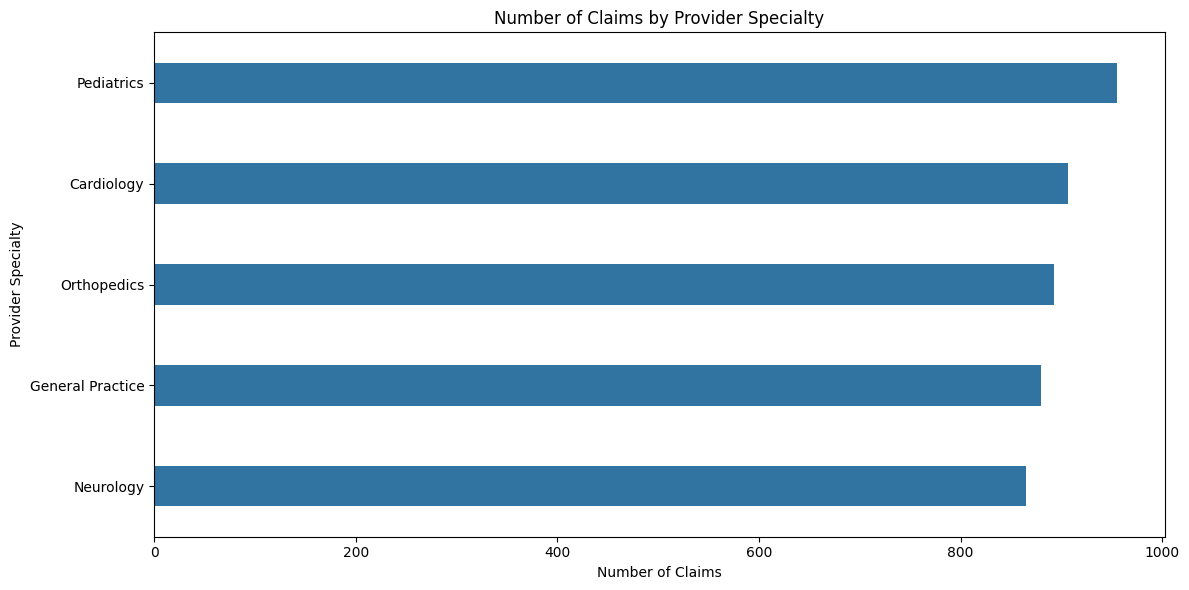

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')  


plt.figure(figsize=(12, 6))
sns.countplot(data=df, y="ProviderSpecialty", width=0.4, order=df["ProviderSpecialty"].value_counts().index)
plt.title("Number of Claims by Provider Specialty")
plt.xlabel("Number of Claims")
plt.ylabel("Provider Specialty")
plt.tight_layout()
plt.show()


### Average Claim Amount by Specialty

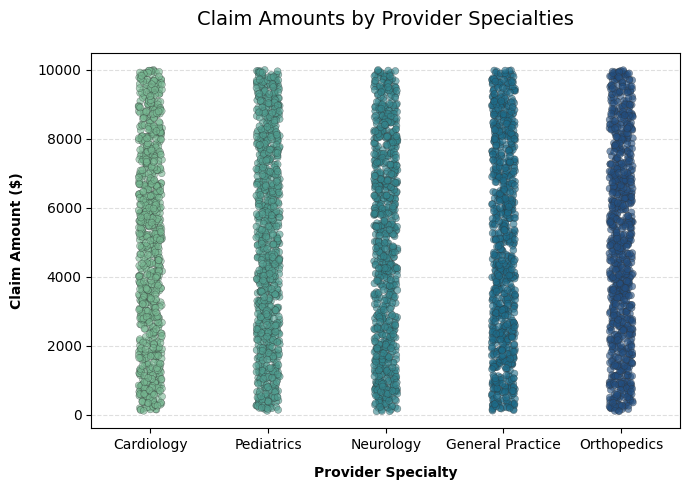

In [8]:
plt.figure(figsize=(7, 5))

# Create the stripplot with enhanced aesthetics
ax = sns.stripplot(
    data=df,
    x="ProviderSpecialty",
    y="ClaimAmount",
    alpha=0.6,    
    palette="crest",  
    size=5,
    linewidth=0.3  
)

plt.title("Claim Amounts by Provider Specialties", fontsize=14, pad=20)
plt.xlabel("Provider Specialty", fontweight='bold', labelpad=10)
plt.ylabel("Claim Amount ($)", fontweight='bold', labelpad=10)


#plt.xticks(rotation=45, ha='right', fontsize=10)
ax.yaxis.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()

# Show plot
plt.show()

### Detect Suspicious Claims Based on Procedure Code vs. Specialty

In [9]:
proc_counts = df.groupby("ProviderSpecialty")["ProcedureCode"].nunique().sort_values(ascending=False)


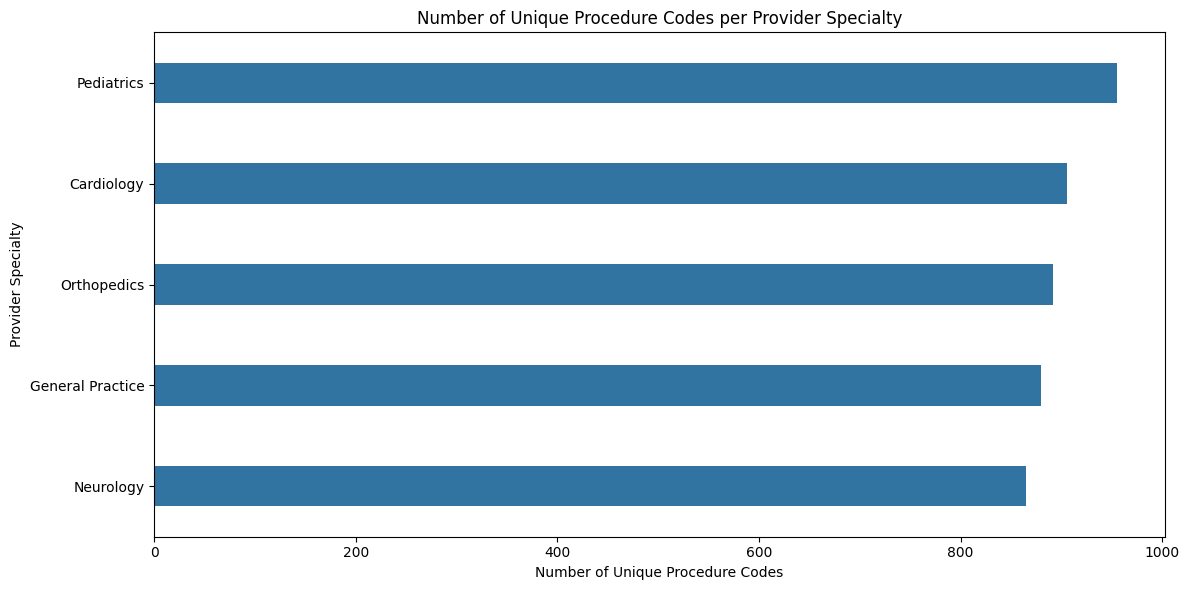

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(
    x=proc_counts.values,
    y=proc_counts.index,
    width= 0.4,
    #palette="crest"
)

plt.title("Number of Unique Procedure Codes per Provider Specialty")
plt.xlabel("Number of Unique Procedure Codes")
plt.ylabel("Provider Specialty")
plt.tight_layout()
plt.show()


**Strategy 1:** Flag if the provider used a procedure code fewer than X times

In [11]:
# Count how many times each (specialty, code) pair occurs
code_counts = df.groupby(["ProviderSpecialty", "ProcedureCode"]).size().reset_index(name="Count")

# Accept only those used >= 5 times
valid_combos_freq = set(
    code_counts[code_counts["Count"] >= 5][["ProviderSpecialty", "ProcedureCode"]].itertuples(index=False, name=None)
)

df["Suspicious_FreqOnly"] = ~df.apply(lambda row: (row["ProviderSpecialty"], row["ProcedureCode"]) in valid_combos_freq, axis=1)


**Strategy 2:** Flag if the code appears < 5 times across all providers, AND this provider used it only once or twice

In [12]:
# Total appearances of each code across all specialties
global_code_counts = df["ProcedureCode"].value_counts()

# Appearances per provider
provider_code_counts = df.groupby(["ProviderID", "ProcedureCode"]).size().reset_index(name="ProviderCodeCount")

# Merge with original data
df_rare = df.merge(provider_code_counts, on=["ProviderID", "ProcedureCode"], how="left")

# Add total global counts
df_rare["GlobalCodeCount"] = df_rare["ProcedureCode"].map(global_code_counts)

# Flag
df_rare["Suspicious_GlobalRarity"] = (
    (df_rare["GlobalCodeCount"] < 5) & (df_rare["ProviderCodeCount"] <= 2)
)


**Strategy 3:** Flag if the procedure is rare (as in Strategy 2), AND claimAmount is in the top 5% (or another threshold)

In [13]:
high_amt_threshold = df["ClaimAmount"].quantile(0.95)

df_rare["Suspicious_RareHighAmt"] = (
    df_rare["Suspicious_GlobalRarity"] & (df_rare["ClaimAmount"] >= high_amt_threshold)
)


Review how many were flagged

In [14]:
print("Strategy 1:", df["Suspicious_FreqOnly"].sum())
print("Strategy 2:", df_rare["Suspicious_GlobalRarity"].sum())
print("Strategy 3:", df_rare["Suspicious_RareHighAmt"].sum())


Strategy 1: 4500
Strategy 2: 4500
Strategy 3: 225


In [15]:
# Put strategy 3 results into a table
suspicious_claims = df_rare[df_rare["Suspicious_RareHighAmt"] == True]


### Patient demographics: Gender by Provider Specialty

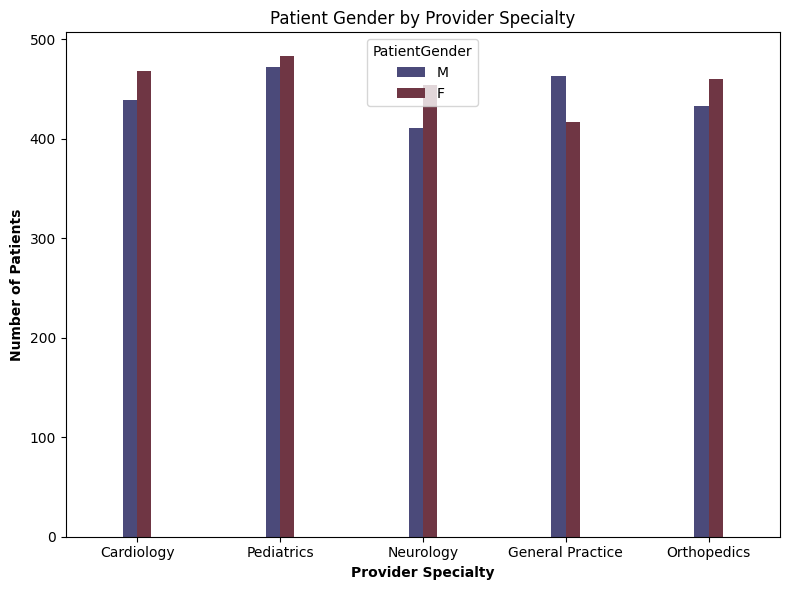

In [16]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="ProviderSpecialty", hue="PatientGender", palette="icefire", dodge=True, width=0.2)
plt.title("Patient Gender by Provider Specialty")
plt.xlabel("Provider Specialty", fontweight='bold')
plt.ylabel("Number of Patients", fontweight='bold')
plt.tight_layout()
plt.show()


### Provider with most total claim amount and highest average claim amounts

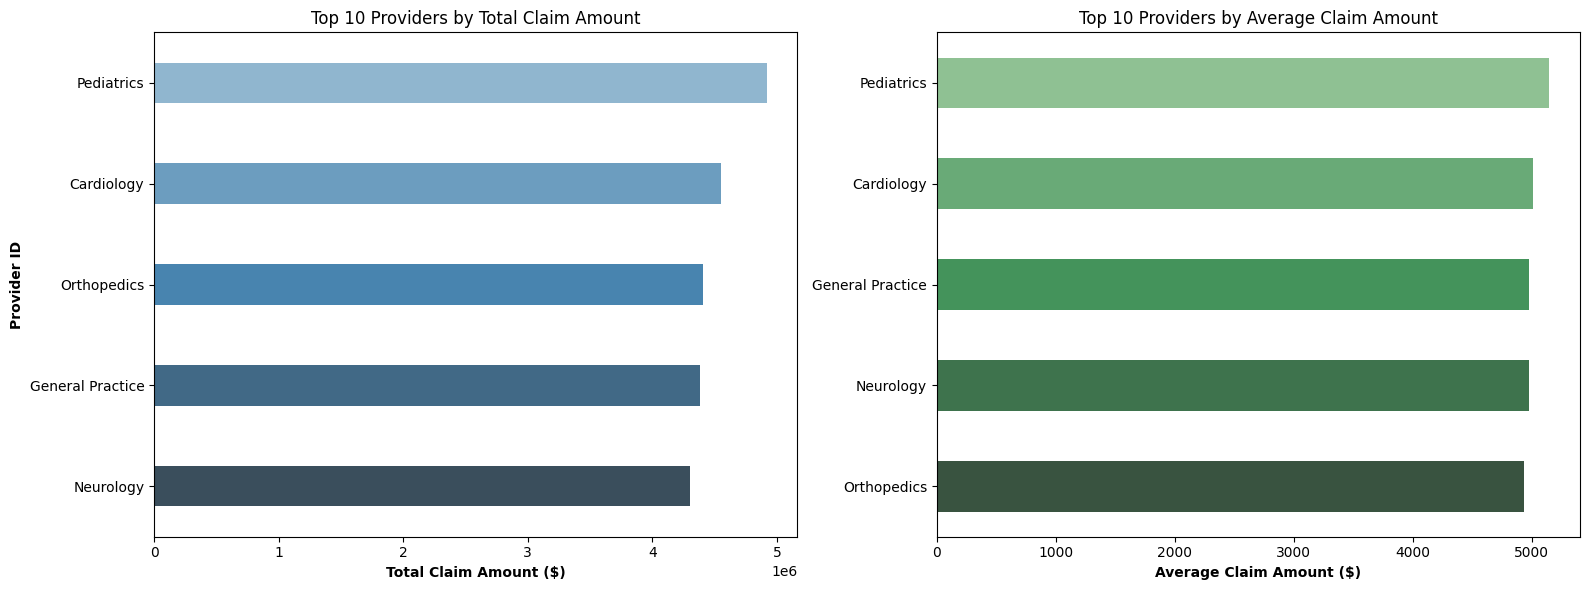

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Total claims per provider
total_claims = df.groupby("ProviderSpecialty")["ClaimAmount"].sum().sort_values(ascending=False).head(10)
sns.barplot(x=total_claims.values, y=total_claims.index, ax=axs[0], palette="Blues_d", width=0.4)
axs[0].set_title("Top 10 Providers by Total Claim Amount")
axs[0].set_xlabel("Total Claim Amount ($)", fontweight='bold')
axs[0].set_ylabel("Provider ID", fontweight='bold')

# Average claims per provider
avg_claims = df.groupby("ProviderSpecialty")["ClaimAmount"].mean().sort_values(ascending=False).head(10)
sns.barplot(x=avg_claims.values, y=avg_claims.index, ax=axs[1], palette="Greens_d", width=0.5)
axs[1].set_title("Top 10 Providers by Average Claim Amount")
axs[1].set_xlabel("Average Claim Amount ($)", fontweight='bold')
axs[1].set_ylabel("")

plt.tight_layout()
plt.show()


 Bar graph: Submission method frequency

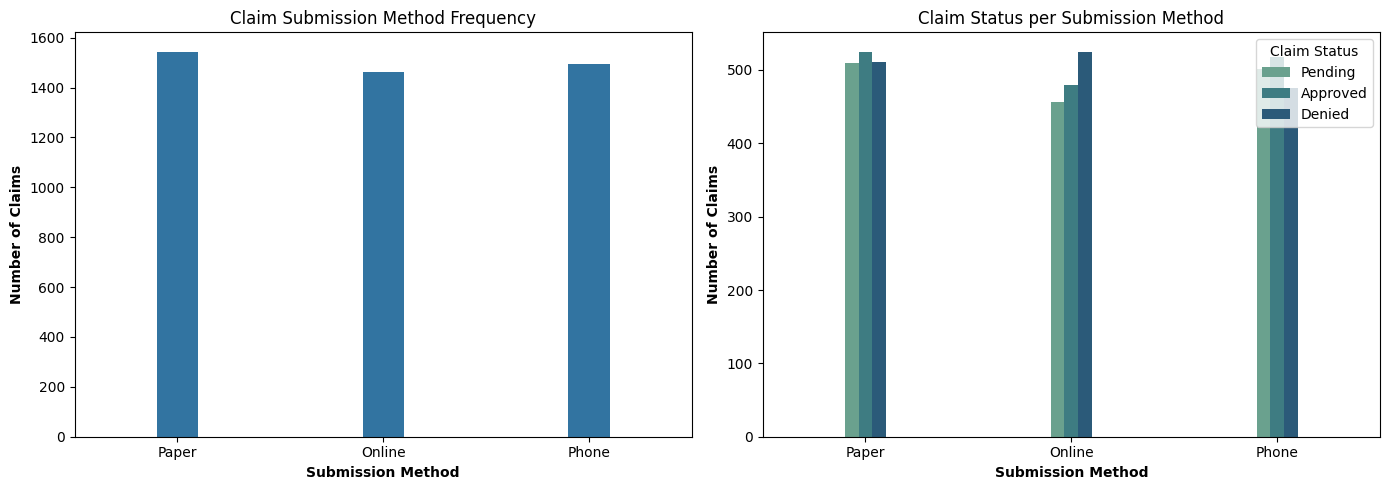

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Claim Submission Method Frequency
sns.countplot(data=df, x="ClaimSubmissionMethod", width=0.2, ax=axes[0])
axes[0].set_title("Claim Submission Method Frequency")
axes[0].set_xlabel("Submission Method", fontweight='bold')
axes[0].set_ylabel("Number of Claims", fontweight='bold')

# Plot 2: Claim Status by Submission Method
sns.countplot(data=df, x="ClaimSubmissionMethod", hue="ClaimStatus", palette="crest", width=0.2, ax=axes[1])
axes[1].set_title("Claim Status per Submission Method")
axes[1].set_xlabel("Submission Method", fontweight='bold')
axes[1].set_ylabel("Number of Claims", fontweight='bold')
axes[1].legend(title="Claim Status")

plt.tight_layout()
plt.show()


## Bar graph: Approved vs Declined claims per provider specialty

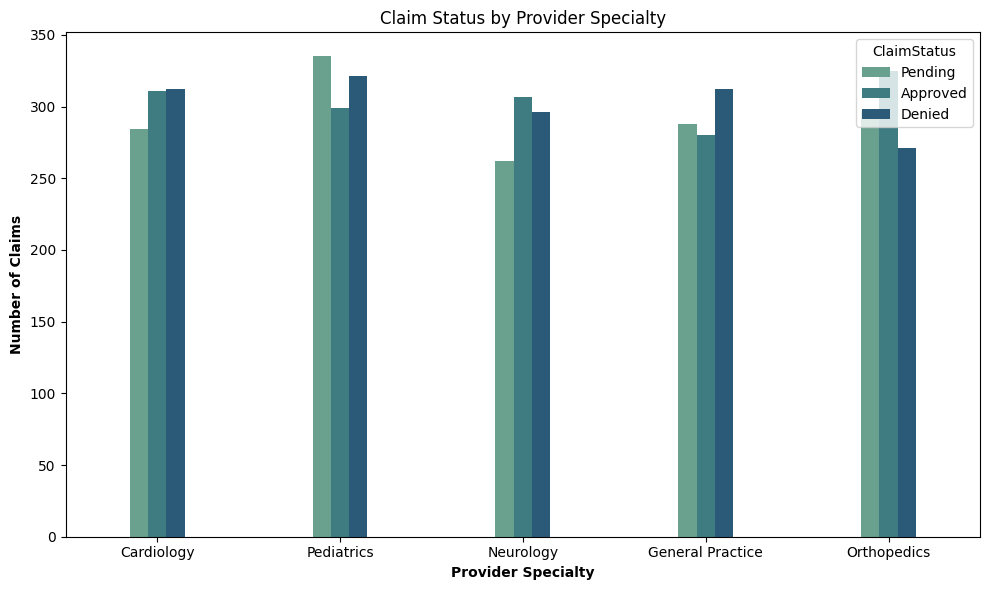

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="ProviderSpecialty", hue="ClaimStatus", palette="crest", dodge=True, width=0.3)
plt.title("Claim Status by Provider Specialty")
plt.xlabel("Provider Specialty", fontweight='bold')
plt.ylabel("Number of Claims", fontweight='bold')
#plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


## Summary

This exploratory data analysis examined a synthetic dataset of 4,500 health insurance claims, including patient demographics, provider information, procedure and diagnosis codes, and claim details.

### Key Findings

- **Provider Behavior**: 
  Some provider specialties consistently submit higher claim amounts. Strategy 3 (detecting rare procedures per specialty) effectively highlighted unusual claim patterns, identifying about 5% of claims as potential outliers.

- **Suspicious Claims**: 
  Strategy 1 and 2 returned nearly all rows due to synthetic data uniformity. However, Strategy 3 isolated rare and unusual procedure-provider combinations that could indicate fraud or improper billing.

- **Claim Amount Analysis**:
  A small number of providers account for the highest total claim amounts.
  Some providers also charge significantly more on average than others, suggesting areas for cost control.

- **Patient Demographics**:
  Patient age and gender distributions vary by provider specialty, showing trends that could inform targeted services or policy reviews.

- **Submission Method and Status**:
  Paper or hard copy submission is the most common method.
  Claim approval and denial rates differ by provider type, indicating potential quality or compliance issues in specific specialties.

## Recommendations

- **Implement Rare Code Monitoring**:
  Use rare procedure-specialty combinations as a rule for automated auditing. This helps flag suspicious claims early.

- **Audit High-Billing Providers**:
  Focus additional scrutiny on providers with both high total and average claim amounts to ensure billing integrity.

- **Streamline Submission Methods**:
  Promote submission methods with higher approval rates and fewer errors to reduce backlogs and rejections.

- **Track Specialty-Specific Trends**:
  Regularly monitor claim trends by specialty to detect shifts in behavior and improve claim processing rules.

- **Refine Rule-Based Systems**:
  Use the insights from this EDA to strengthen automated rules for vetting claims—especially in flagging anomalies in charge amounts, patient volume, and provider procedures.

